# Investigation of Epsilon Values
The primary goal of this notebook is to run the optimization for several epsilon values to investigate their influence and find suitable numbers. By systematically varying the epsilon values and evaluating the results, we can better understand how epsilon impacts the optimization process and the quality of solutions obtained.

This is done through the following steps:
1. **Set Up Logging**: Initialize logging to monitor the progress and debug information during the execution of the optimization process.
2. **Load Model and Scenarios**: Load the model configured for problem formulation 6 and read the selected scenarios from a CSV file.
3. **Create Scenario Objects**: Convert the data from the CSV file into `Scenario` objects that can be used by the EMA Workbench.
4. **Define Optimization Parameters**: Specify the epsilon values to be investigated for the epsilon constraint method and the number of function evaluations (nfe) for the optimization.
5. **Run Optimization**: Execute the optimization process for each set of epsilon values across all scenarios. This will generate results and convergence metrics, which will be saved to CSV files.
6. **Load and Analyze Results**: Load the optimization results from the archive files and focus on the outcomes of interest.
7. **Visualize Results**: Generate parallel coordinates plots for the outcomes of interest, highlighting how the different epsilon values affect the optimization results. These plots will be saved as image files for further analysis.

In [5]:
# Standard library imports
import os

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EMA Workbench imports
import ema_workbench
from ema_workbench import (
    Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator,
    ema_logging, Constant, Scenario, HypervolumeMetric,
    GenerationalDistanceMetric, EpsilonIndicatorMetric,
    InvertedGenerationalDistanceMetric, SpacingMetric, Constraint)
from ema_workbench.em_framework.optimization import (
    EpsilonProgress, to_problem, ArchiveLogger, epsilon_nondominated)
from ema_workbench.analysis import parcoords
from ema_workbench.em_framework.optimization import EpsilonProgress

# Custom problem formulation import
from problem_formulation import get_model_for_problem_formulation

In [6]:
def run_optimization(epsilon, nfe, scenarios):
    """
    Run optimization using the EMA Workbench.

    Parameters:
    epsilon (list): The epsilon values for the optimization.
    nfe (int): The number of function evaluations.
    scenarios (list): List of scenarios to be evaluated.

    Returns:
    tuple: A tuple containing results and convergences.
    """
    # Initialize lists to store results and convergence metrics
    results = []
    convergences = []

    # Ensure the base directory exists
    base_dir = "./archives_epsilon"
    os.makedirs(base_dir, exist_ok=True)

    # Use MultiprocessingEvaluator for parallel processing
    with MultiprocessingEvaluator(model) as evaluator:
        # Iterate over each scenario
        for scenario in scenarios:
            # Perform optimization three times for each scenario
            for i in range(3):
                # Define convergence metrics
                convergence_metrics = [
                    ArchiveLogger(
                        base_dir,
                        [l.name for l in model.levers],
                        [o.name for o in model.outcomes],
                        base_filename="optimization.tar.gz",
                    ),
                    EpsilonProgress(),
                ]

                # Run the optimization
                result, convergence = evaluator.optimize(
                    nfe=nfe,
                    searchover="levers",
                    epsilons=epsilon,
                    constraints=None,
                    convergence=convergence_metrics,
                    reference=scenario,
                )

                # Create result directory if it does not exist
                result_dir = base_dir
                os.makedirs(result_dir, exist_ok=True)
                
                # Save the results and convergence metrics to CSV files
                result.to_csv(os.path.join(result_dir, f"result__scen{scenario.name}__seed{i}.csv"))
                pd.DataFrame(convergence).to_csv(os.path.join(result_dir, f"convergence__scen{scenario.name}__seed{i}.csv"))

                # Append the results and convergence metrics to the lists
                results.append(result)
                convergences.append(convergence)
    
    # Return the results and convergence metrics
    return results, convergences

In [7]:
def load_results_from_files(directory):
    """
    Load optimization results from CSV files in a specified directory.

    Parameters:
    directory (str): The directory containing the result files.

    Returns:
    DataFrame: A concatenated DataFrame containing all the results.
    """
    # Initialize an empty list to store the individual DataFrames
    results = []

    # Iterate over each file in the specified directory
    for file_name in os.listdir(directory):
        # Check if the file name starts with 'result__' and ends with '.csv'
        if file_name.startswith('result__') and file_name.endswith('.csv'):
            # Read the CSV file into a DataFrame
            df = pd.read_csv(os.path.join(directory, file_name))
            # Append the DataFrame to the results list
            results.append(df)

    # Concatenate all the individual DataFrames into a single DataFrame
    all_results = pd.concat(results)
    
    # Return the concatenated DataFrame
    return all_results

[MainProcess/INFO] pool started with 8 workers
10455it [05:28, 31.84it/s]                                                     
[MainProcess/INFO] optimization completed, found 130 solutions
10546it [05:37, 31.21it/s]                                                     
[MainProcess/INFO] optimization completed, found 150 solutions
10609it [05:42, 31.01it/s]                                                     
[MainProcess/INFO] optimization completed, found 140 solutions
10559it [05:46, 30.51it/s]                                                     
[MainProcess/INFO] optimization completed, found 180 solutions
10643it [05:47, 30.64it/s]                                                     
[MainProcess/INFO] optimization completed, found 186 solutions
10773it [05:48, 30.92it/s]                                                     
[MainProcess/INFO] optimization completed, found 232 solutions
10486it [05:38, 30.98it/s]                                                     
[MainProcess/IN

Total number of results for epsilon [1000000, 1000000, 1000000, 1000000, 10, 1000000]: 2393


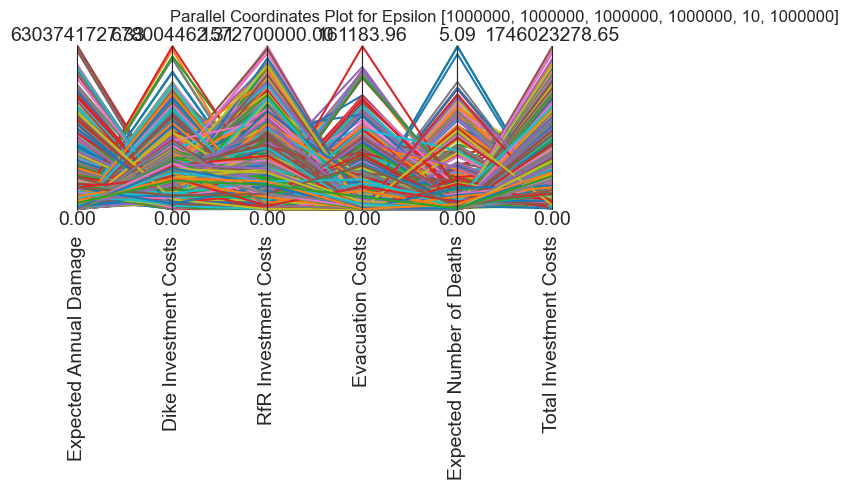

[MainProcess/INFO] pool started with 8 workers
10541it [05:40, 30.96it/s]                                                     
[MainProcess/INFO] optimization completed, found 166 solutions
10617it [05:42, 30.96it/s]                                                     
[MainProcess/INFO] optimization completed, found 163 solutions
10476it [05:37, 31.04it/s]                                                     
[MainProcess/INFO] optimization completed, found 141 solutions
11115it [06:08, 30.19it/s]                                                     
[MainProcess/INFO] optimization completed, found 302 solutions
10928it [06:10, 29.52it/s]                                                     
[MainProcess/INFO] optimization completed, found 255 solutions
10971it [06:04, 30.06it/s]                                                     
[MainProcess/INFO] optimization completed, found 266 solutions
10619it [05:46, 30.68it/s]                                                     
[MainProcess/IN

Total number of results for epsilon [10000, 10000, 10000, 10000, 1, 10000]: 3151


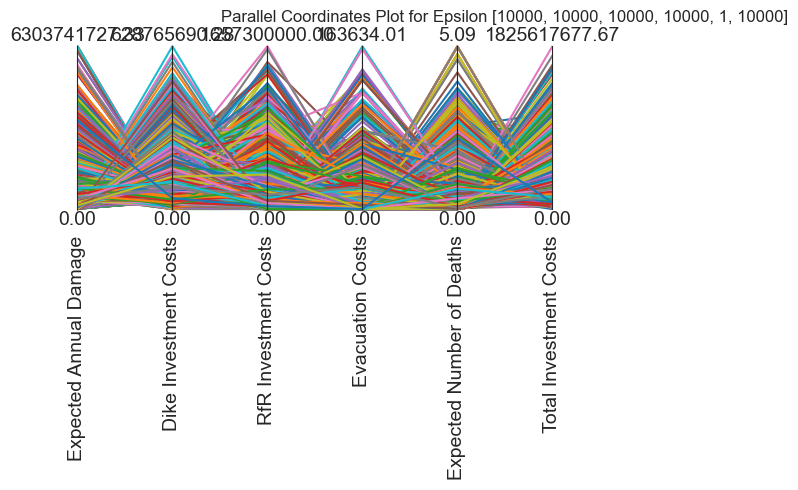

[MainProcess/INFO] pool started with 8 workers
11112it [06:04, 30.48it/s]                                                     
[MainProcess/INFO] optimization completed, found 314 solutions
10705it [05:46, 30.94it/s]                                                     
[MainProcess/INFO] optimization completed, found 207 solutions
10727it [05:38, 31.70it/s]                                                     
[MainProcess/INFO] optimization completed, found 216 solutions
11339it [06:02, 31.31it/s]                                                     
[MainProcess/INFO] optimization completed, found 395 solutions
11389it [06:05, 31.15it/s]                                                     
[MainProcess/INFO] optimization completed, found 397 solutions
11489it [06:09, 31.12it/s]                                                     
[MainProcess/INFO] optimization completed, found 387 solutions
10873it [05:43, 31.68it/s]                                                     
[MainProcess/IN

Total number of results for epsilon [1000, 1000, 1000, 1000, 0.1, 1000]: 4768


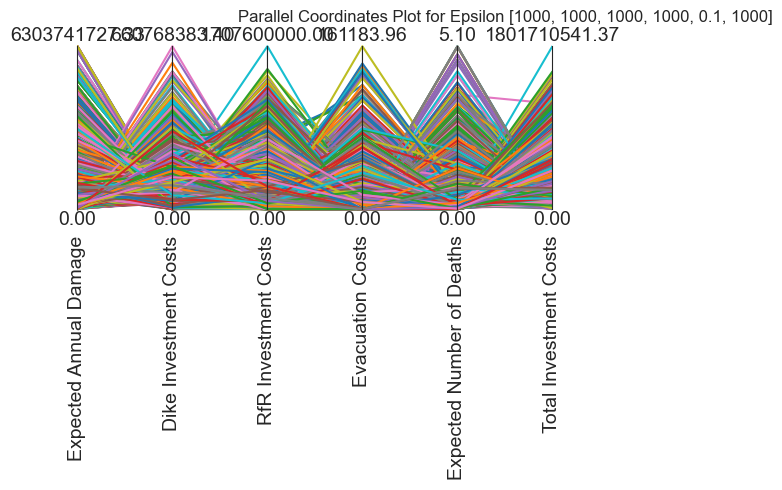

In [8]:
if __name__ == '__main__':
    # Set up logging to stderr with INFO level
    ema_logging.log_to_stderr(ema_logging.INFO)

    # Get the model and steps for problem formulation 6
    model, steps = get_model_for_problem_formulation(6)

    # Load scenarios from a CSV file
    scenarios_df = pd.read_csv("./data/selected_scenarios.csv")

    # Initialize a list to store scenarios
    scenarios = []
    
    # Iterate over each row in the scenarios dataframe to create Scenario objects
    for index in range(scenarios_df.shape[0]):
        scenario = {}
        for column in scenarios_df:
            if column == 'Run ID':
                continue
            # Update the scenario dictionary with column values
            scenario.update({column: scenarios_df.loc[index, column]})

        # Create an EMA Workbench Scenario object
        ema_scenario = Scenario(scenarios_df.loc[index, 'Run ID'], **scenario)
        # Append the scenario to the list
        scenarios.append(ema_scenario)

    # Define epsilon values for the optimization 
    epsilon_values = [
        [1000000, 1000000, 1000000, 1000000, 10, 1000000],
        [10000, 10000, 10000, 10000, 1, 10000],
        [1000, 1000, 1000, 1000, 0.1, 1000],
        ]
    # Set the number of function evaluations
    nfe = 10000

    # Iterate over each set of epsilon values
    for eps in epsilon_values:
        # Run optimization for the given epsilon values and scenarios
        results, convergences = run_optimization(eps, nfe, scenarios)

        # Load results from the archive files
        all_results = load_results_from_files("./archives_epsilon")

        # Print the total number of results for the current epsilon value
        total_results = all_results.shape[0]
        print(f"Total number of results for epsilon {eps}: {total_results}")

        # Define outcomes of interest
        outcomes_of_interest = [
            'Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 
            'Evacuation Costs', 'Expected Number of Deaths', 'Total Investment Costs'
            ]
        # Extract the outcomes from the results
        outcomes = all_results[outcomes_of_interest]

        # Get the limits for the parallel coordinates plot
        limits = parcoords.get_limits(outcomes)
        # Create a ParallelAxes object with the limits
        axes = parcoords.ParallelAxes(limits)
        # Plot the outcomes on the parallel coordinates plot
        axes.plot(outcomes)

        # Set the title and save the plot as an image file
        plt.title(f'Parallel Coordinates Plot for Epsilon {eps}')
        plt.savefig(f'parallel_coordinates_eps_{eps}.png')
        plt.show()


The conclusion from our analysis is that the epsilon values [1000000, 1000000, 1000000, 1000000, 10, 1000000] are the most suitable. This choice is based on the observation that lower epsilon values resulted in an excessive number of solutions, which negatively affected computation speed and complexity. Therefore, the selected epsilon values strike a balance between solution quality and computational efficiency, making them ideal for further optimizations.